# Download and Explore Farmers Market dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          85 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge


geopy-1.19.0         | 53 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##



In [6]:
df_farmers = pd.read_csv("data/DOHMH_Farmers_Markets_and_Food_Boxes.csv")
df_farmers.head()

FileNotFoundError: File b'data/DOHMH_Farmers_Markets_and_Food_Boxes.csv' does not exist



The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2


In [13]:
# The code was removed by Watson Studio for sharing.

,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
2,1 Centre Street,Farmers Markets and Food Boxes,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.713028,-74.003753,Open year-round,NaN,NaN,NaN,NaN,NaN,2:00 pm - 6:00 pm,NaN,NaN,NaN,True,False,True,https://www.grownyc.org/greenmarketco/foodbox,"(40.7130276, -74.0037529)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"


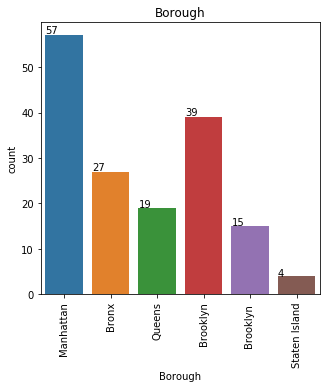

In [14]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=df_farmers)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [16]:


# FM_NYC_filtered - Dataset with only Farmers Market
df_farmers_filtered = df_farmers[df_farmers['Service Type'] == 'Farmers Markets'].copy()
df_farmers_filtered ['Borough'] = df_farmers_filtered['Borough'].map(lambda x: x.strip())
print(df_farmers_filtered.shape)
df_farmers_filtered.head()



(144, 24)


,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"


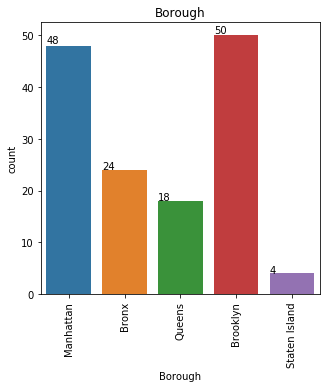

In [17]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=df_farmers_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Manhattan amd Brooklyn has highest numbers of Farmers Markets

<b>Use geopy library to get the latitude and longitude values of New York City</b>

In [18]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with Facility name and Borough of Farmers Market superimposed on top

In [19]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(df_farmers_filtered['Latitude'], df_farmers_filtered['Longitude'], df_farmers_filtered['FacilityName'], df_farmers_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets